# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [128]:
%pip install --upgrade plotly


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [129]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [130]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [131]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [132]:
print("df_hh_income:")
print("Columns:", df_hh_income.columns)
print("Shape:", df_hh_income.shape)

print("df_pct_poverty:")
print("Columns:", df_pct_poverty.columns)
print("Shape:", df_pct_poverty.shape)

print("df_pct_completed_hs:")
print("Columns:", df_pct_completed_hs.columns)
print("Shape:", df_pct_completed_hs.shape)

print("df_share_race_city:")
print("Columns:", df_share_race_city.columns)
print("Shape:", df_share_race_city.shape)

print("df_fatalities:")
print("Columns:", df_fatalities.columns)
print("Shape:", df_fatalities.shape)

# Check for NaN values and duplicates in df_hh_income
print("NaN values in df_hh_income:")
print(df_hh_income.isnull().sum())
print("Duplicates in df_hh_income:")
print(df_hh_income.duplicated().sum())

# Check for NaN values and duplicates in df_pct_poverty
print("NaN values in df_pct_poverty:")
print(df_pct_poverty.isnull().sum())
print("Duplicates in df_pct_poverty:")
print(df_pct_poverty.duplicated().sum())

# Check for NaN values and duplicates in df_pct_completed_hs
print("NaN values in df_pct_completed_hs:")
print(df_pct_completed_hs.isnull().sum())
print("Duplicates in df_pct_completed_hs:")
print(df_pct_completed_hs.duplicated().sum())

# Check for NaN values and duplicates in df_share_race_city
print("NaN values in df_share_race_city:")
print(df_share_race_city.isnull().sum())
print("Duplicates in df_share_race_city:")
print(df_share_race_city.duplicated().sum())

# Check for NaN values and duplicates in df_fatalities
print("NaN values in df_fatalities:")
print(df_fatalities.isnull().sum())
print("Duplicates in df_fatalities:")
print(df_fatalities.duplicated().sum())


df_hh_income:
Columns: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Shape: (29322, 3)
df_pct_poverty:
Columns: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Shape: (29329, 3)
df_pct_completed_hs:
Columns: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Shape: (29329, 3)
df_share_race_city:
Columns: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Shape: (29268, 7)
df_fatalities:
Columns: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
Shape: (2535, 14)
NaN values in df_hh_income:
Geographic Area     0
City                0
Median Income      51
dtype: int64
Duplicates in df_hh_income:
0
NaN values in df_pct_poverty:
Geographic Area    0
City               0
povert

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [133]:
df_hh_income.fillna(0, inplace=True)
df_pct_poverty.fillna(0, inplace=True)
df_pct_completed_hs.fillna(0, inplace=True)
df_share_race_city.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [134]:
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"], errors="coerce")
poverty_per_state = df_pct_poverty.groupby("Geographic Area")["poverty_rate"].mean().reset_index()

fig = px.bar(poverty_per_state, x="Geographic Area", y="poverty_rate", title="Poverty Rate by State")
fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [135]:
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"], errors="coerce")
poverty_per_state = df_pct_completed_hs.sort_values(by="percent_completed_hs", ascending=True).groupby("Geographic Area")["percent_completed_hs"].mean().reset_index()

fig = px.bar(poverty_per_state, x="Geographic Area", y="percent_completed_hs", title="Poverty Rate by State")
fig.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

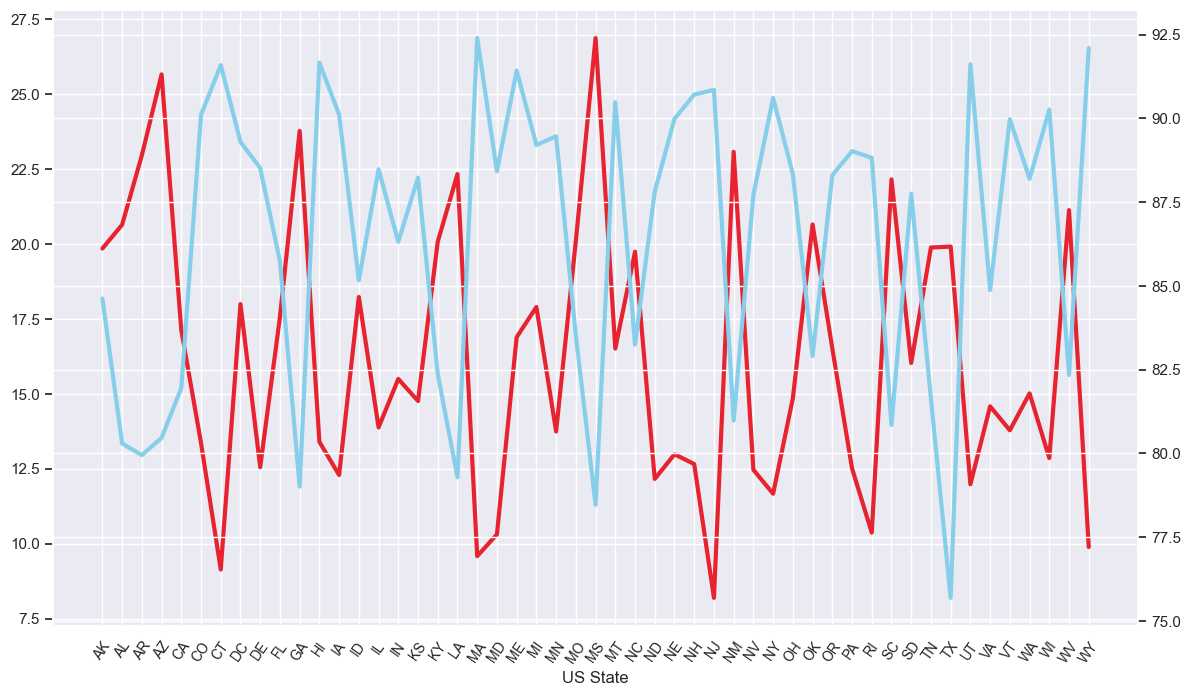

In [136]:
poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()
completed = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()

plt.figure(figsize=(14,8))
plt.xlabel('US State', fontsize=12)
plt.xticks(fontsize=10, rotation=55)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(poverty.index, poverty, color='#E6232E', linewidth=3)
ax2.plot(completed.index, completed, color='skyblue', linewidth=3)

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

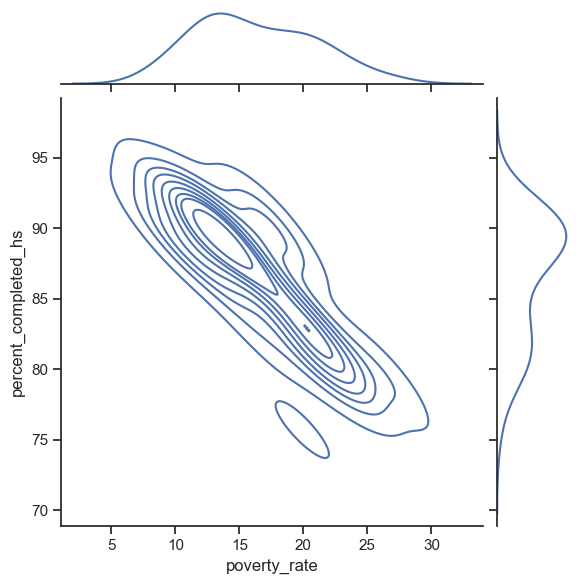

In [137]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])

df_pct_poverty.sort_values('poverty_rate', ascending=False, inplace=True)
df_pct_completed_hs.sort_values('percent_completed_hs', ascending=False, inplace=True)

poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()
hs = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()

merged = pd.merge(hs, poverty, on='Geographic Area', how='inner')

sns.set_theme(style="ticks")
sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=merged, kind='kde')
plt.show()


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

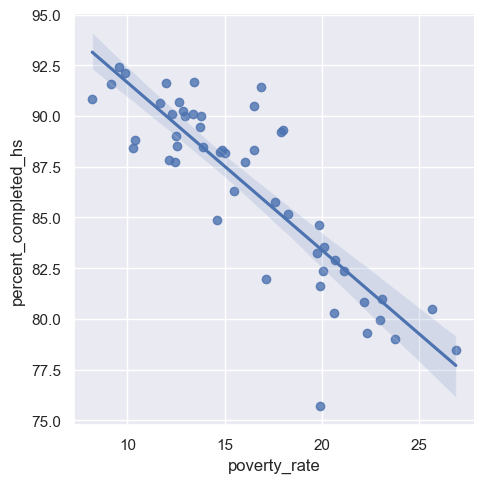

In [138]:
sns.set_theme(color_codes=True)

sns.lmplot(x='poverty_rate', y='percent_completed_hs', data=merged)
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [139]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [140]:
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')
chart_data = df_share_race_city.groupby('Geographic area').agg({'share_white': 'mean', 'share_black': 'mean', 'share_native_american': 'mean', 'share_asian': 'mean', 'share_hispanic': 'mean'})

fig = px.bar(chart_data, x=chart_data.index, y=['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'], barmode='group')
fig.update_layout(
  title="Racial Makeup of Each US State",
  xaxis_title="US State",
  yaxis_title="%",
  legend_title="Race"
)
fig.show()




# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [141]:
dead_by_race = df_fatalities["race"].value_counts()
dead_by_race

W    1201
B     618
H     423
0     195
A      39
N      31
O      28
Name: race, dtype: int64

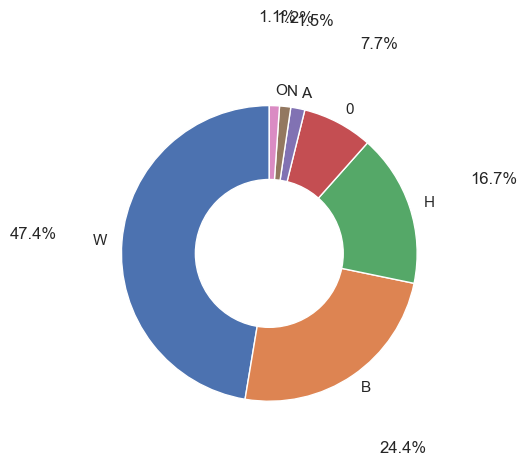

In [142]:
plt.pie(dead_by_race, labels=dead_by_race.index, autopct='%1.1f%%', startangle=90, pctdistance=1.6)

circle = plt.Circle((0, 0), 0.5, color='white')
plt.gca().add_artist(circle)
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

<BarContainer object of 2 artists>

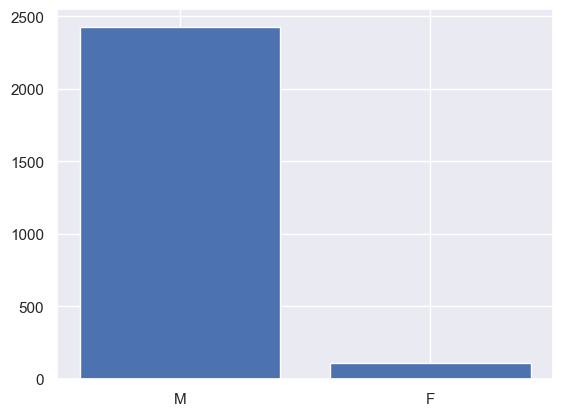

In [143]:
men_vs_women_deaths = df_fatalities['gender'].value_counts()
men_vs_women_deaths

plt.bar(men_vs_women_deaths.index, men_vs_women_deaths.values)

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [144]:
df_fatalities['age'] = df_fatalities['age'].replace(np.nan, 0)
df_fatalities.age.isnull().any()
death_age = df_fatalities[['age', 'manner_of_death', 'gender']]
death_age

,age,manner_of_death,gender
0,53.00,shot,M
1,47.00,shot,M
2,23.00,shot and Tasered,M
3,32.00,shot,M
4,39.00,shot,M
...,...,...,...
2530,31.00,shot,M
2531,0.00,shot,M
2532,48.00,shot,M
2533,28.00,shot,M


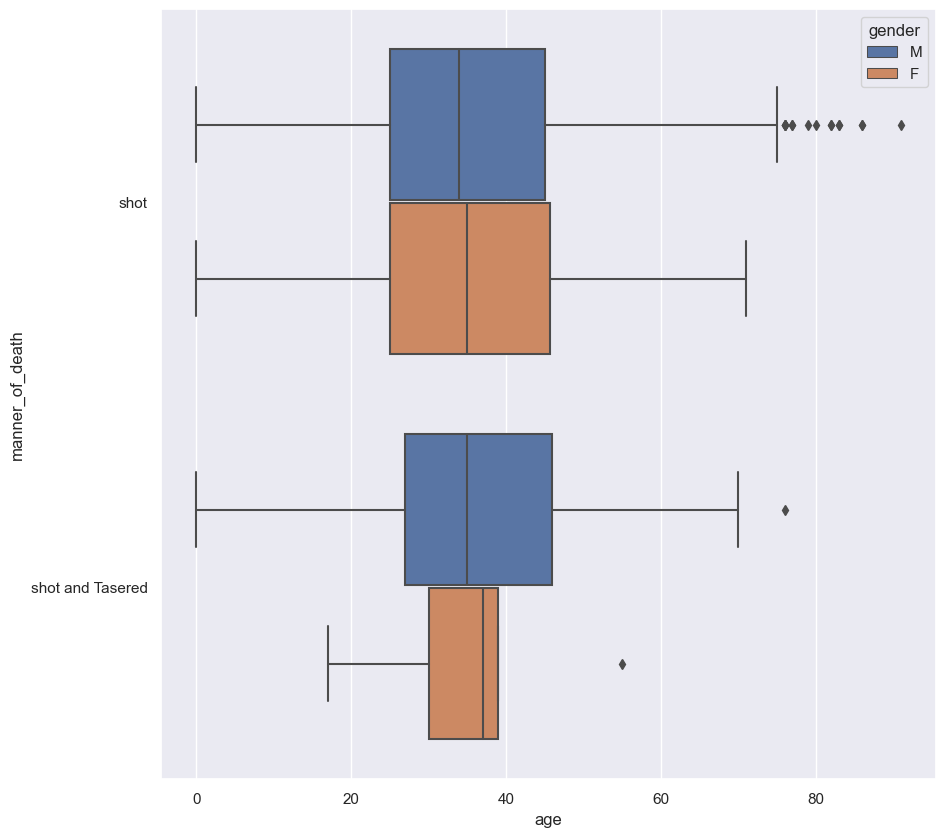

In [145]:
plt.figure(figsize=(10,10))
sns.boxplot(x='age', y='manner_of_death', hue='gender', data=death_age)
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

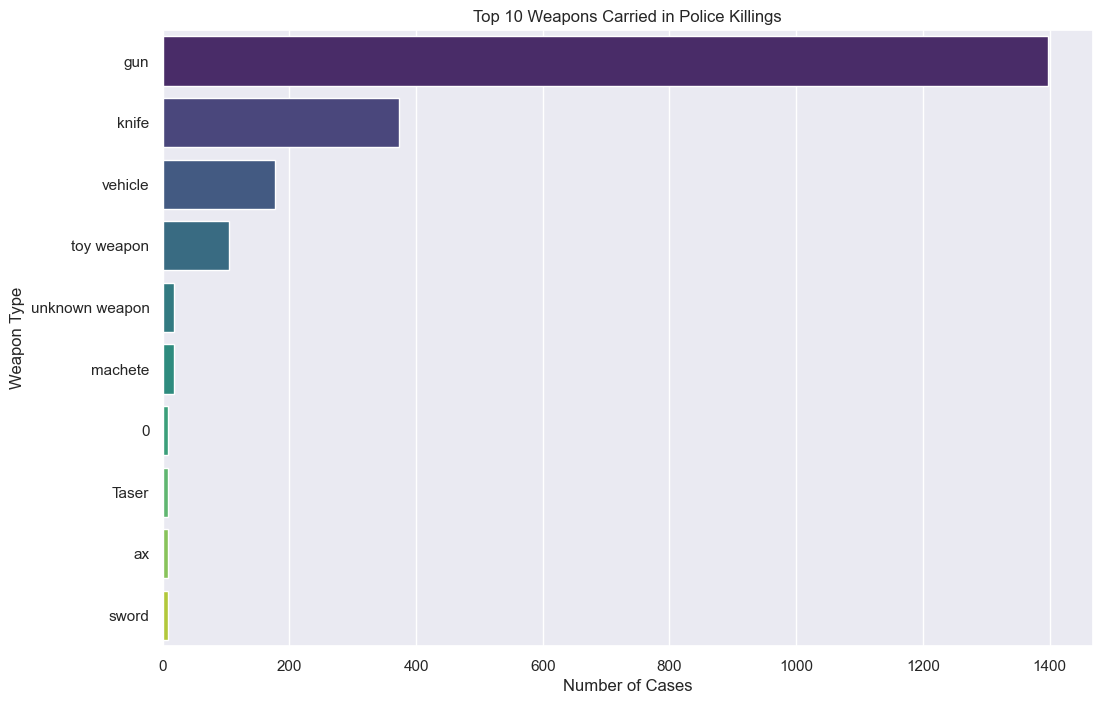

In [148]:
armed_count = df_fatalities['armed'].value_counts()
total_cases = len(df_fatalities)
armed_cases = armed_count.drop(['unarmed', 'undetermined']).sum()
unarmed_cases = armed_count.get('unarmed', 0)
undetermined_cases = armed_count.get('undetermined', 0)

percent_armed = (armed_cases / total_cases) * 100
percent_unarmed = (unarmed_cases / total_cases) * 100
percent_undetermined = (undetermined_cases / total_cases) * 100

weapon_counts = armed_count.drop(['unarmed', 'undetermined'])
top_weapon_counts = weapon_counts.head(10)  # Selecting top 10 for clarity in visualization

plt.figure(figsize=(12, 8))
sns.barplot(x=top_weapon_counts.values, y=top_weapon_counts.index, palette="viridis")
plt.title('Top 10 Weapons Carried in Police Killings')
plt.xlabel('Number of Cases')
plt.ylabel('Weapon Type')
plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [159]:
killed_under_25 = df_fatalities[df_fatalities['age'] < 25]
killed_under_25_cases = killed_under_25.value_counts().sum()
total_cases = len(df_fatalities)

percent_killed = (killed_under_25_cases / total_cases) * 100
print(percent_killed)

20.78895463510848


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

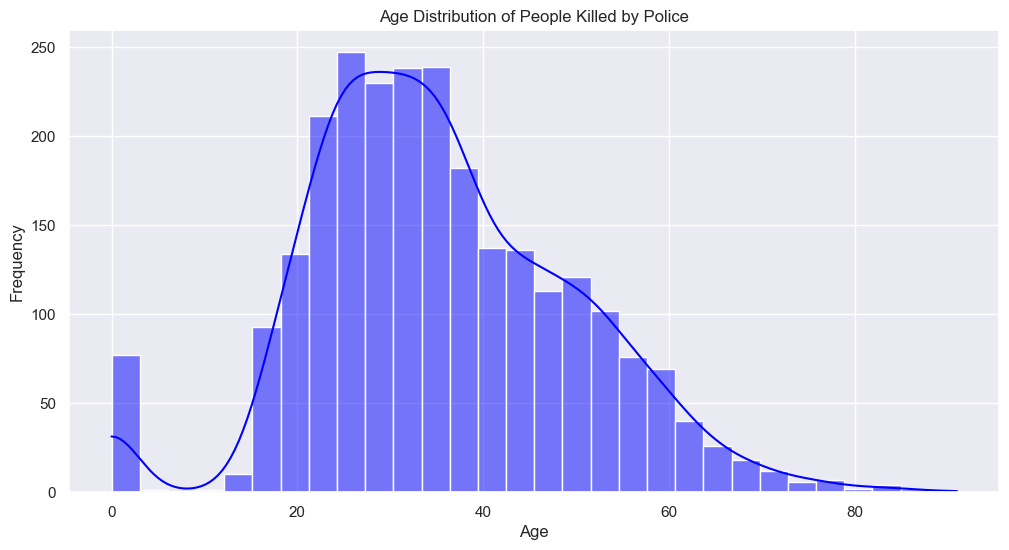

In [161]:
plt.figure(figsize=(12, 6))

# Dropping NaN values in the age column
age_data = df_fatalities['age'].dropna()

# Creating the histogram and KDE plot
sns.histplot(age_data, bins=30, kde=True, color='blue')

plt.title('Age Distribution of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

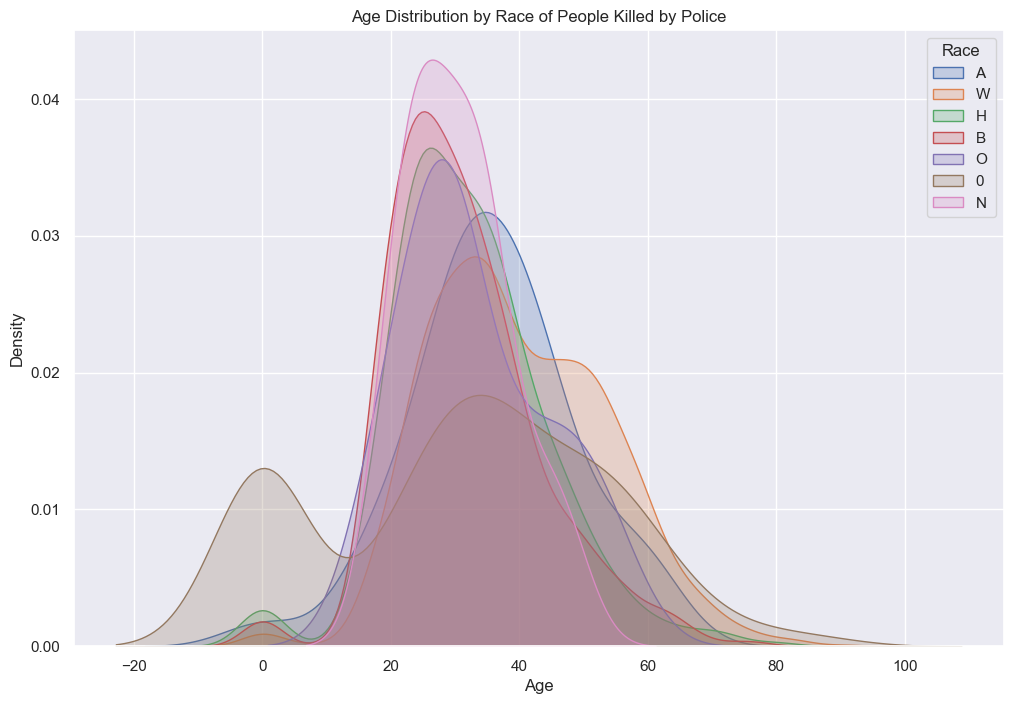

In [163]:
plt.figure(figsize=(12, 8))

# Dropping rows where age or race is NaN
age_race_data = df_fatalities[['age', 'race']].dropna()

# List of races to plot
races = age_race_data['race'].unique()

# Creating a KDE plot for each race
for race in races:
    sns.kdeplot(age_race_data[age_race_data['race'] == race]['age'], label=race, fill=True)

plt.title('Age Distribution by Race of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Race')

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

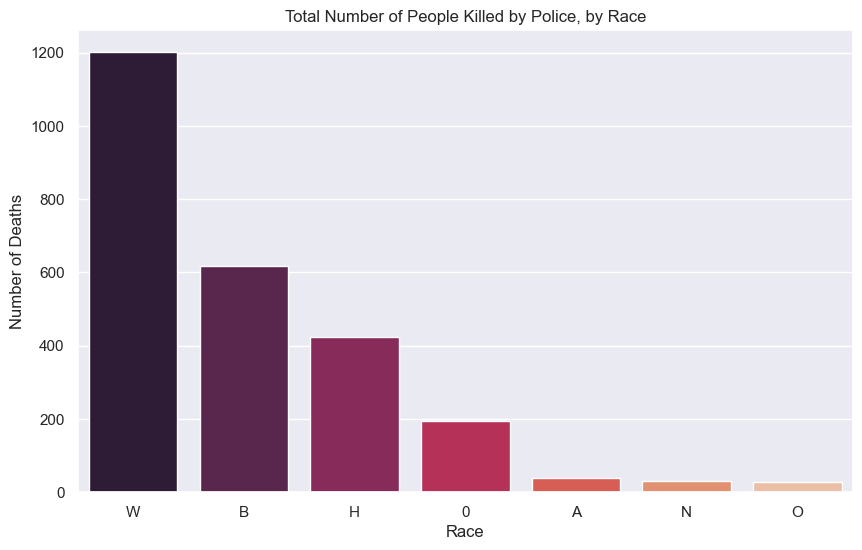

In [168]:
race_death_counts = df_fatalities['race'].value_counts()

# Creating the chart
plt.figure(figsize=(10, 6))
sns.barplot(x=race_death_counts.index, y=race_death_counts.values, palette="rocket")

plt.title('Total Number of People Killed by Police, by Race')
plt.xlabel('Race')
plt.ylabel('Number of Deaths')

plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

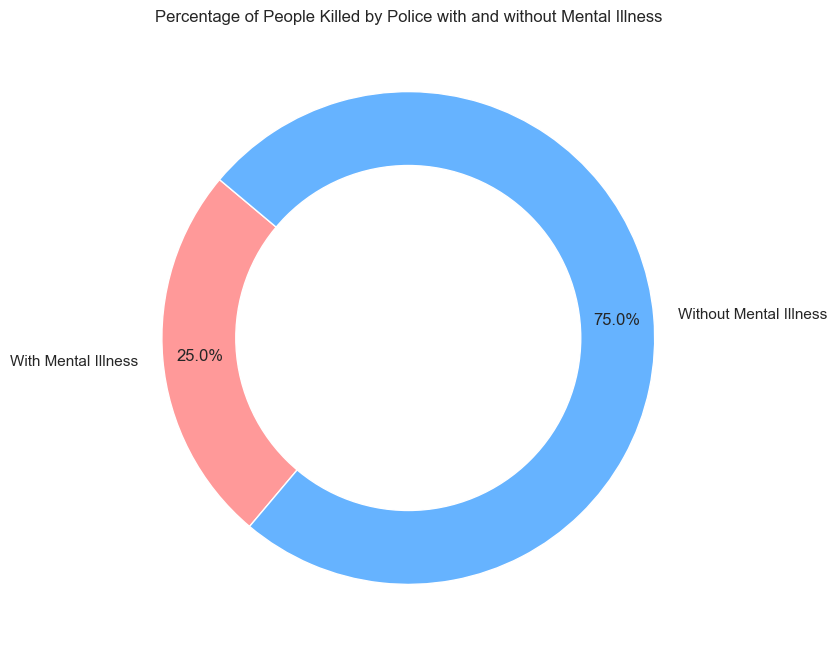

In [170]:
mental_illness_counts = df_fatalities['signs_of_mental_illness'].value_counts()

percent_with_mental_illness = (mental_illness_counts[True] / total_cases) * 100

percent_with_mental_illness, mental_illness_counts[True], mental_illness_counts[False]

labels = ['With Mental Illness', 'Without Mental Illness']
sizes = [mental_illness_counts[True], mental_illness_counts[False]]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Percentage of People Killed by Police with and without Mental Illness')
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

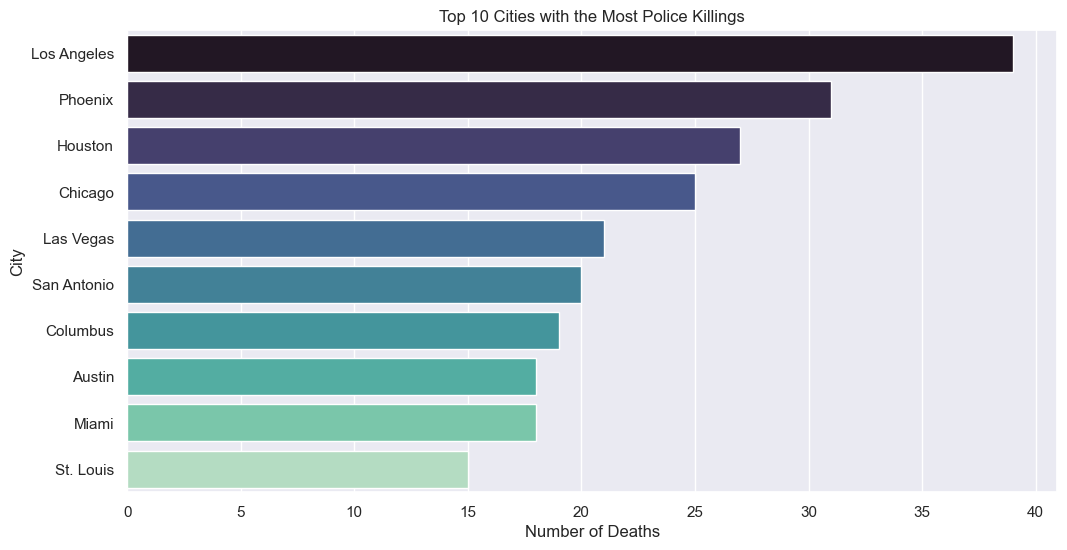

In [172]:
city_death_counts = df_fatalities['city'].value_counts().head(10)

# Creating the chart
plt.figure(figsize=(12, 6))
sns.barplot(x=city_death_counts.values, y=city_death_counts.index, palette="mako")

plt.title('Top 10 Cities with the Most Police Killings')
plt.xlabel('Number of Deaths')
plt.ylabel('City')

plt.show()


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [174]:
top_10_cities = city_death_counts.index.tolist()

killings_by_race_city = df_fatalities[df_fatalities['city'].isin(top_10_cities)].groupby(['city', 'race']).size().unstack(fill_value=0)

killings_by_race_city

race,0,A,B,H,N,O,W
city,,,,,,,
Austin,0,0,3,2,0,0,13
Chicago,1,0,21,1,0,0,2
Columbus,1,0,11,0,0,1,6
Houston,1,1,15,6,1,0,3
Las Vegas,4,0,3,5,0,0,9
Los Angeles,3,1,10,19,0,0,6
Miami,1,0,8,6,0,0,3
Phoenix,3,0,2,11,3,0,12
San Antonio,2,0,3,12,0,0,3


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

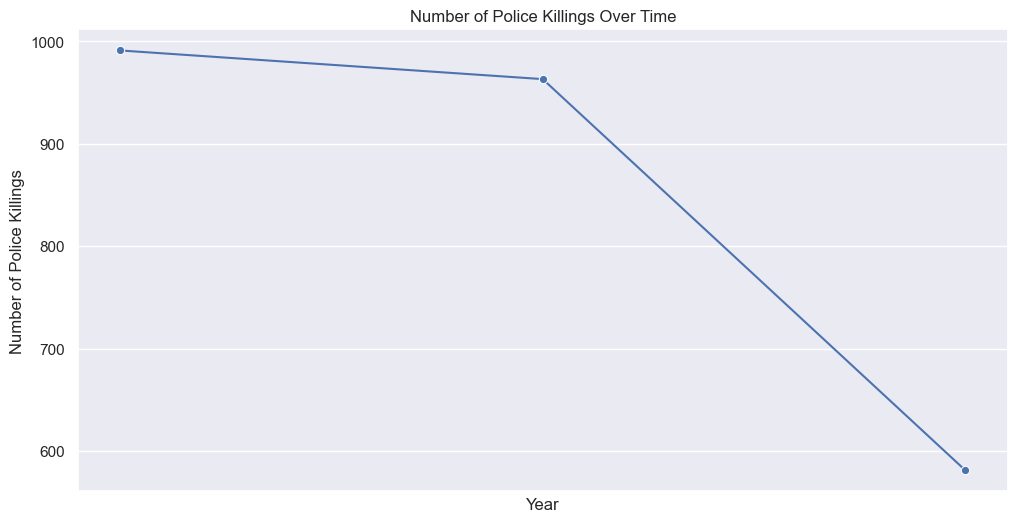

In [175]:
import matplotlib.dates as mdates

df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], errors='coerce')

# Grouping the data by year to analyze the trend over time
killings_by_year = df_fatalities['date'].groupby(df_fatalities.date.dt.year).agg('count')

# Creating a line plot to show the trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=killings_by_year.index, y=killings_by_year.values, marker='o')

plt.title('Number of Police Killings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Police Killings')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).